## Завдання:

Побудувати моделi наївної байесiвської класифiкацiї за припущень:
- Данi в кожному класi мають нормальний розподiл без коварiацiї мiж вимiрами
- Данi в кожному класi мають полiномiальний розподiл

&nbsp;

Початковi данi:

(a) from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60 , random_state=0)

rng = np.random.RandomState(13)

X_stretched = np.dot(X, rng.randn(2, 2))

(б) import numpy as np

np.random.seed(0)

X = np.random.randn(300, 2)

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

## Виконання завдання

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics

In [33]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

### Набір даних (а)

In [34]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

Візуалізація даних

In [35]:
np.unique(y_true)

array([0, 1, 2, 3])

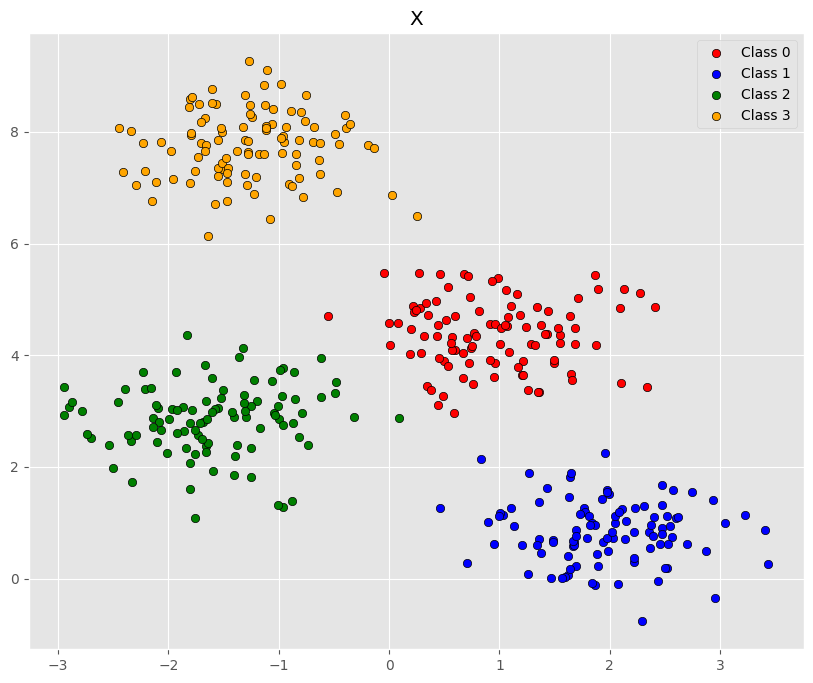

In [36]:
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X")
plt.show()

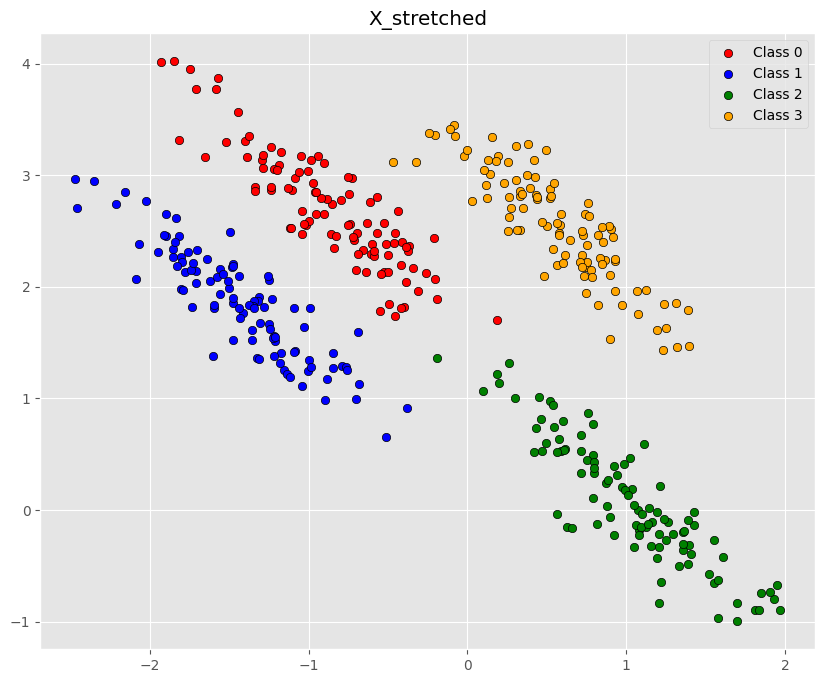

In [37]:
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X_stretched")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [38]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y_true, test_size=0.2)
train_data_stretched, test_data_stretched, train_labels_stretched, test_labels_stretched = model_selection.train_test_split(X_stretched, y_true, test_size=0.2)

In [39]:
train_data.shape

(320, 2)

In [40]:
test_data.shape

(80, 2)

In [41]:
train_labels.shape

(320,)

In [42]:
test_labels.shape

(80,)

Побудова моделі 1. Припущення про те що дані в кожному класі мають нормальний розпоіл без коваріації між вимірами для даних Х

In [43]:
model = naive_bayes.GaussianNB()
model.fit(train_data, train_labels)
model.predict(test_data)

array([3, 3, 1, 0, 3, 3, 1, 1, 3, 2, 2, 0, 1, 2, 1, 0, 0, 2, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 2, 2, 1, 3, 3,
       3, 1, 2, 2, 1, 0, 3, 3, 2, 0, 0, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 3,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 3, 2, 0])

In [44]:
test_labels

array([3, 3, 1, 0, 3, 3, 1, 1, 3, 2, 2, 0, 1, 2, 1, 0, 0, 2, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 2, 2, 1, 3, 3,
       3, 1, 2, 2, 1, 0, 3, 3, 2, 0, 0, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 3,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 3, 2, 0])

In [45]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 80 прикладів з 80


Перенавчання відсутнє

Апостеріорні імовірності:

In [46]:
model.predict_proba(test_data)

array([[5.80371681e-08, 1.13820594e-38, 7.55306737e-16, 9.99999942e-01],
       [3.22347279e-10, 1.72894363e-40, 1.38118071e-12, 1.00000000e+00],
       [1.09730786e-01, 8.78603852e-01, 1.16653622e-02, 9.27225750e-22],
       [1.00000000e+00, 9.55161646e-16, 3.26896532e-11, 4.40068829e-11],
       [8.45815116e-05, 1.56332292e-29, 1.16341118e-08, 9.99915407e-01],
       [5.21743288e-05, 1.11182964e-28, 2.06412411e-06, 9.99945762e-01],
       [1.87622997e-06, 9.99996467e-01, 1.65670904e-06, 1.86241293e-31],
       [8.87039933e-04, 9.99112167e-01, 7.92888258e-07, 5.37877538e-28],
       [1.29967156e-14, 1.18486237e-54, 3.55868520e-25, 1.00000000e+00],
       [8.66145131e-04, 1.05553342e-17, 9.99131883e-01, 1.97165532e-06],
       [1.60929600e-07, 1.65248725e-10, 9.99999839e-01, 3.00969802e-19],
       [9.99999915e-01, 2.28893480e-11, 8.53697992e-08, 8.01827236e-13],
       [1.10519901e-12, 1.00000000e+00, 1.16047709e-13, 3.82062570e-46],
       [7.32745603e-08, 1.01740474e-13, 9.99999927e

Границі рішень:

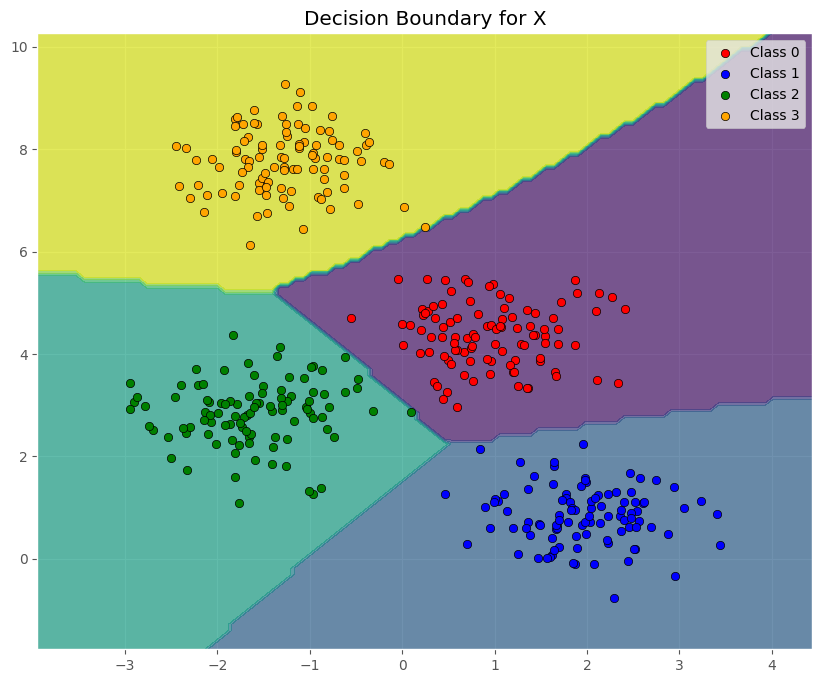

In [47]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X")
plt.show()

Розрахунок критеріїв якості:

In [48]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[19,  0,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  0, 18,  0],
       [ 0,  0,  0, 25]])

In [49]:
metrics.precision_score(test_labels, model.predict(test_data), average=None)

array([1., 1., 1., 1.])

In [50]:
metrics.recall_score(test_labels, model.predict(test_data), average=None)

array([1., 1., 1., 1.])

In [51]:
metrics.f1_score(test_labels, model.predict(test_data), average=None)

array([1., 1., 1., 1.])

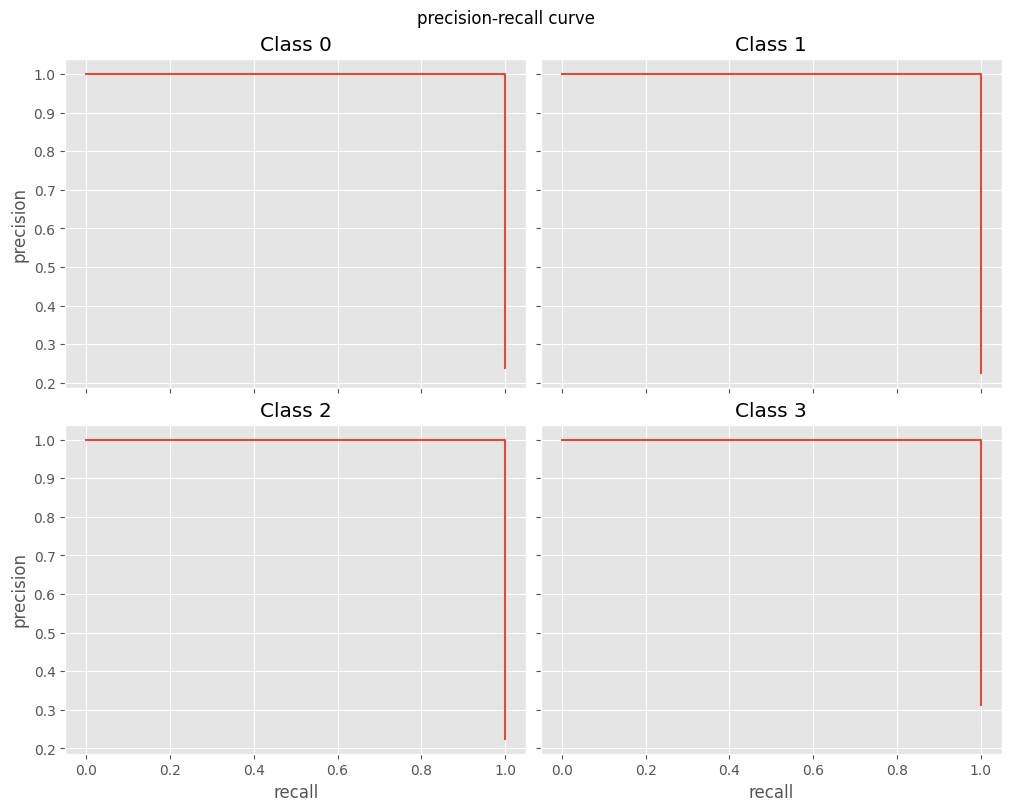

In [52]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

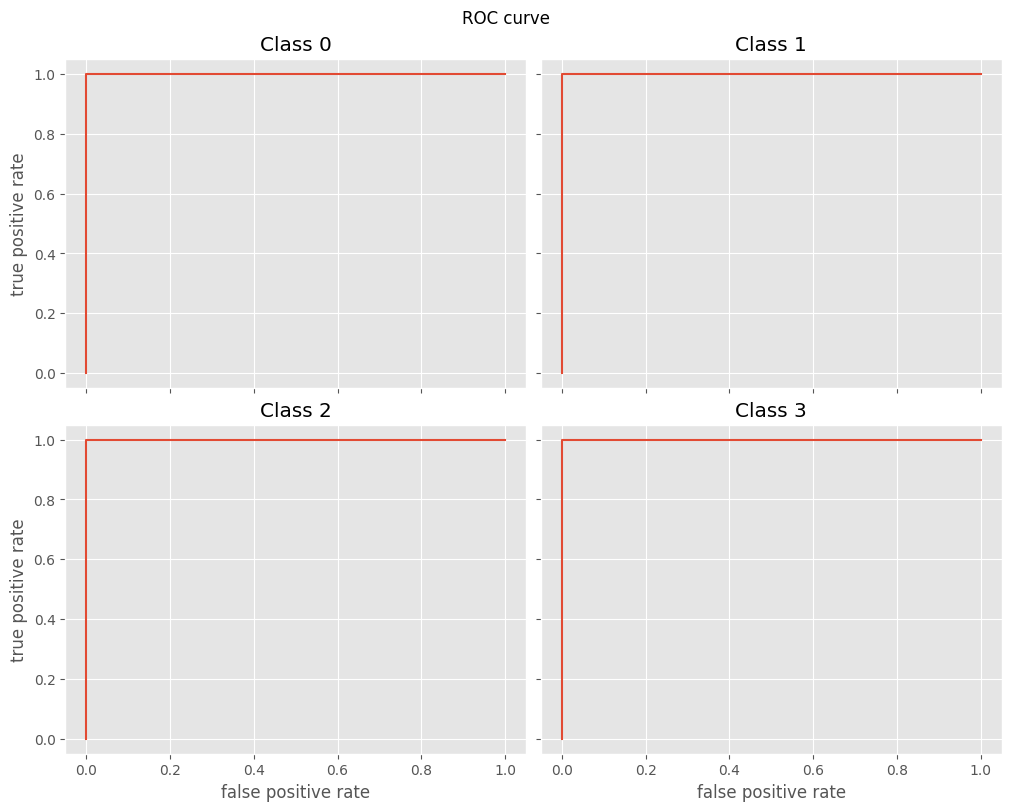

In [53]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [54]:
metrics.roc_auc_score(test_labels, model.predict_proba(test_data), multi_class='ovr', average=None)

array([1., 1., 1., 1.])

Решітчастий пошук для підбору гіперпараметрів:

In [55]:
parameters = {'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

GaussianNB(var_smoothing=0.1)

Навчання моделі на підмножині навчальних даних

In [56]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([3, 3, 0, 0, 3, 3, 1, 1, 3, 3, 2, 0, 1, 2, 1, 0, 0, 0, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 1, 3, 1, 1, 1, 0, 0, 2, 0, 1, 3, 3,
       3, 1, 0, 2, 1, 0, 3, 3, 1, 0, 0, 0, 2, 0, 1, 3, 3, 3, 1, 1, 0, 3,
       0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 3, 1, 0])

In [57]:
test_labels

array([3, 3, 1, 0, 3, 3, 1, 1, 3, 2, 2, 0, 1, 2, 1, 0, 0, 2, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 2, 2, 1, 3, 3,
       3, 1, 2, 2, 1, 0, 3, 3, 2, 0, 0, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 3,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 3, 2, 0])

In [58]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 68 прикладів з 80


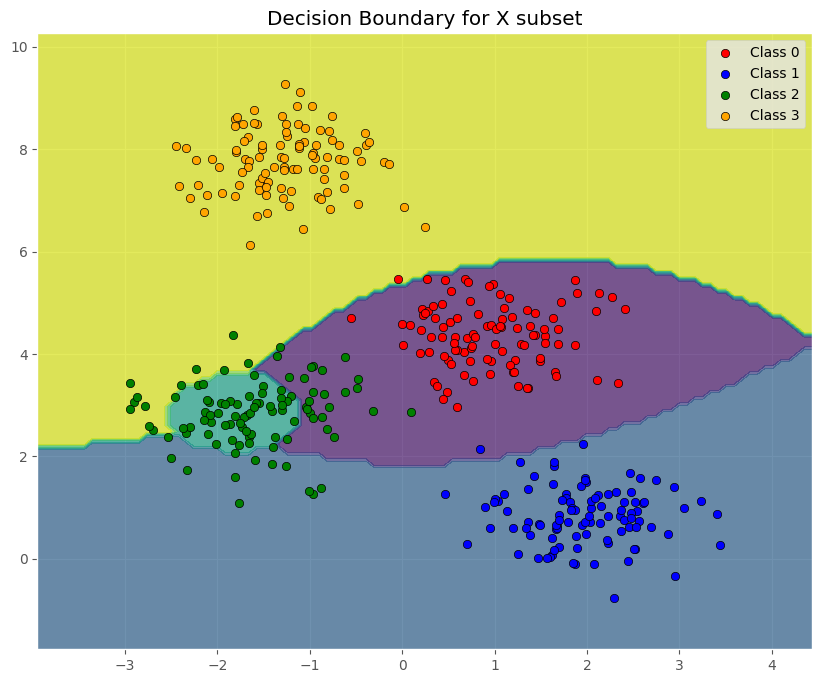

In [59]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X subset")
plt.show()

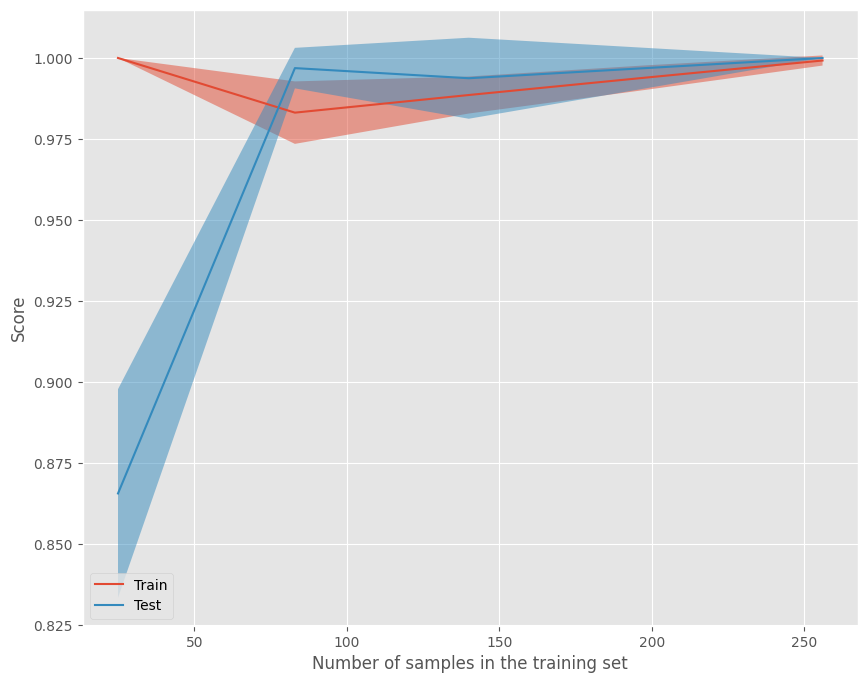

In [60]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є досить гарною моделлю. 

Побудова моделі 2. Припущення про те що дані в кожному класі мають нормальний розпоіл без коваріації між вимірами для даних Х_stretched

In [61]:
model = naive_bayes.GaussianNB()
model.fit(train_data_stretched, train_labels_stretched)
model.predict(test_data_stretched)

array([2, 3, 1, 2, 0, 3, 3, 2, 1, 0, 2, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 3, 0, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0,
       0, 3, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3, 0, 3, 2, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 1, 2, 3, 1, 0, 2, 2, 3, 3])

In [62]:
test_labels_stretched

array([2, 3, 1, 2, 0, 3, 3, 2, 1, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 3, 0, 3, 0, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0,
       0, 3, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3, 0, 3, 2, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 1, 2, 3, 1, 0, 2, 2, 3, 3])

In [63]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 78 прикладів з 80


Перенавчання відсутнє

Апостеріорні імовірності:

In [64]:
model.predict_proba(train_data_stretched)

array([[9.55770033e-01, 2.14464505e-02, 4.75447075e-09, 2.27835115e-02],
       [3.26962935e-11, 1.27750354e-13, 9.99999803e-01, 1.96607491e-07],
       [9.53958078e-01, 4.60416138e-02, 1.98276727e-17, 3.08295863e-07],
       ...,
       [6.78250948e-01, 3.21629930e-01, 1.83045843e-10, 1.19122000e-04],
       [3.09095246e-06, 7.50029608e-08, 9.99245162e-01, 7.51672111e-04],
       [2.39132818e-09, 1.35448640e-11, 9.99993181e-01, 6.81698536e-06]])

Границі рішень:

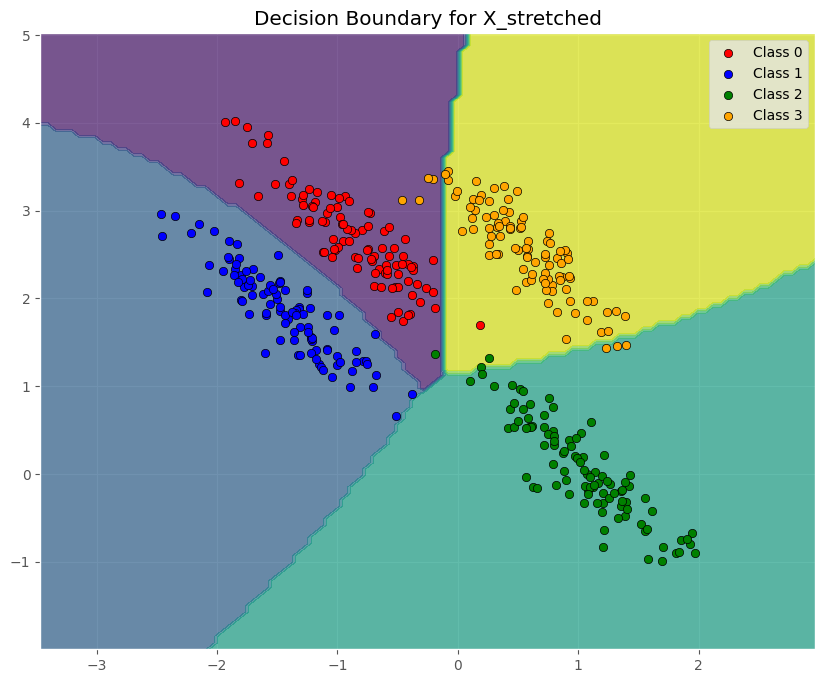

In [65]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched")
plt.show()

Розрахунок критеріїв якості:

In [66]:
metrics.confusion_matrix(test_labels_stretched, model.predict(test_data_stretched))

array([[23,  0,  0,  0],
       [ 0, 16,  0,  0],
       [ 0,  0, 21,  0],
       [ 1,  0,  1, 18]])

In [67]:
metrics.precision_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.95833333, 1.        , 0.95454545, 1.        ])

In [68]:
metrics.recall_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1. , 1. , 1. , 0.9])

In [69]:
metrics.f1_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.9787234 , 1.        , 0.97674419, 0.94736842])

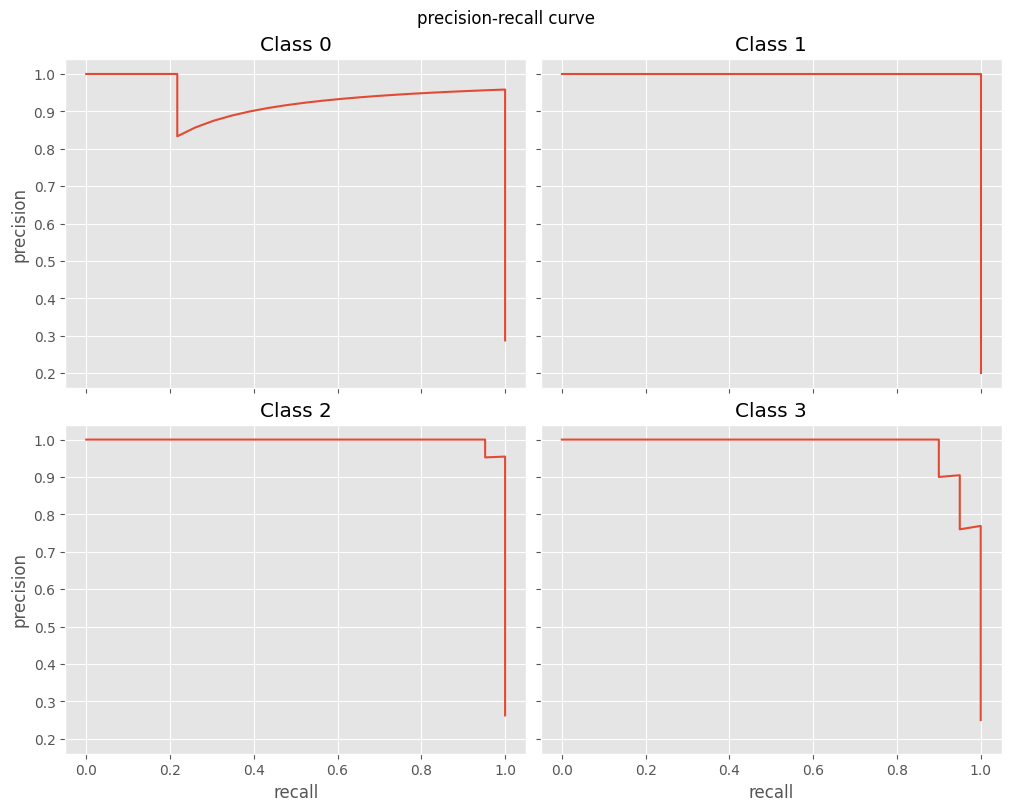

In [70]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

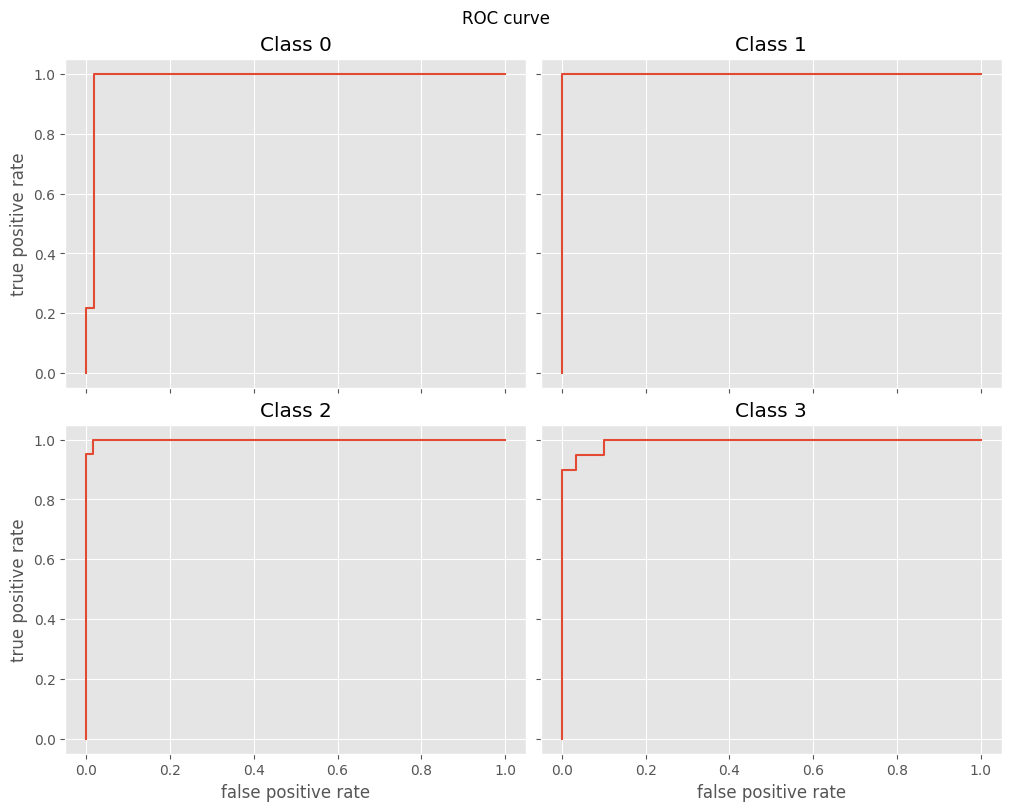

In [71]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [72]:
metrics.roc_auc_score(test_labels_stretched, model.predict_proba(test_data_stretched), multi_class='ovr', average=None)

array([0.98627002, 1.        , 0.9991929 , 0.99333333])

Решітчастий пошук для підбору гіперпараметрів:

In [73]:
parameters = {'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_stretched, train_labels_stretched)
grid_search.best_estimator_

GaussianNB(var_smoothing=0.1)

Навчання моделі на підмножині навчальних даних

In [74]:
model.fit(train_data_stretched[:20], train_labels_stretched[:20])
model.predict(test_data_stretched)

array([3, 3, 1, 2, 0, 3, 3, 2, 1, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 3, 0, 1, 3, 0, 2, 3, 3, 1, 3, 2, 3, 3, 0,
       0, 3, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3, 0, 3, 2, 1, 1, 2, 0,
       2, 0, 3, 1, 0, 1, 2, 3, 1, 0, 2, 2, 3, 3])

In [75]:
test_labels_stretched

array([2, 3, 1, 2, 0, 3, 3, 2, 1, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 3, 0, 3, 0, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0,
       0, 3, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3, 0, 3, 2, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 1, 2, 3, 1, 0, 2, 2, 3, 3])

In [76]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 76 прикладів з 80


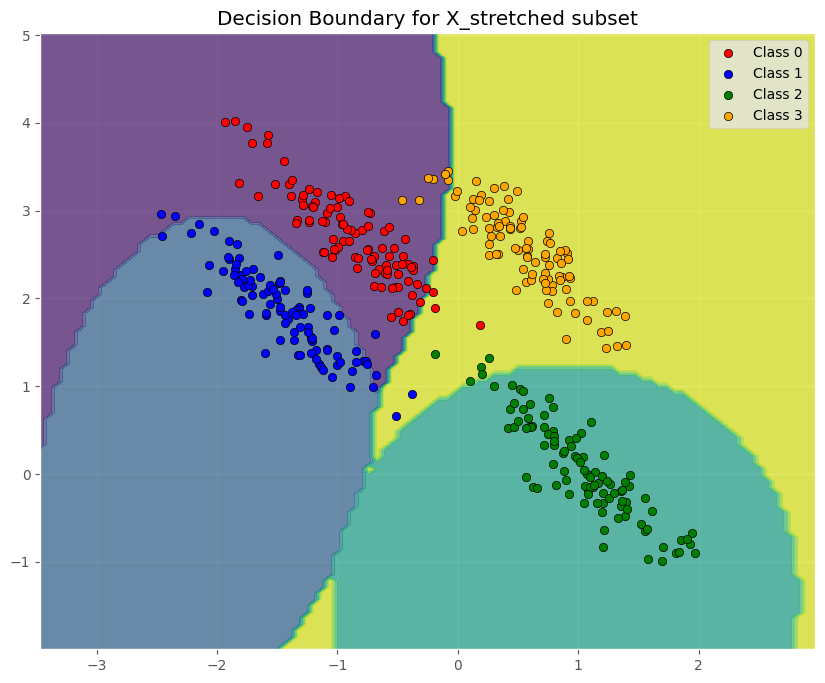

In [77]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched subset")
plt.show()

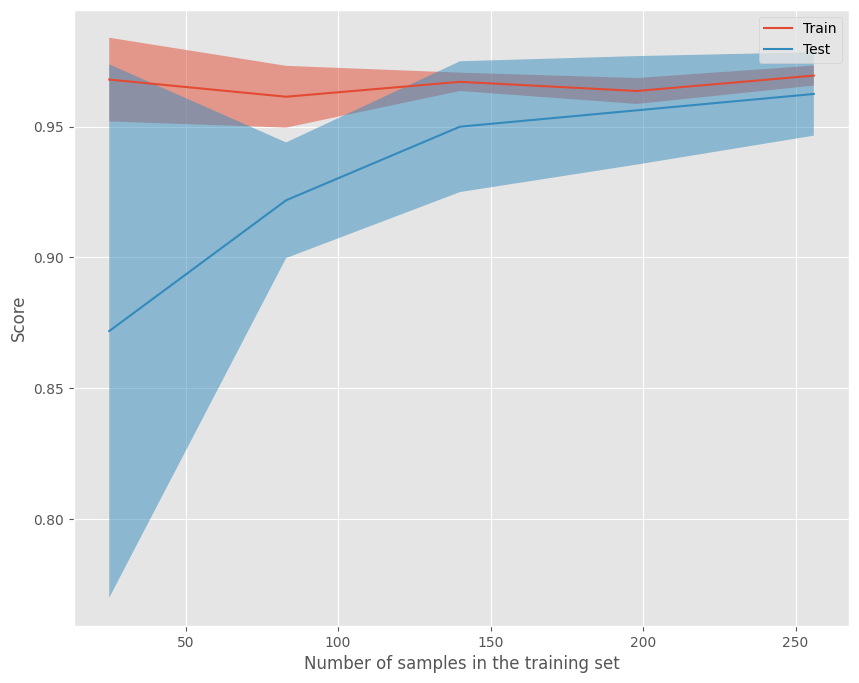

In [78]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_stretched, train_labels_stretched)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є досить гарною моделлю. 

Побудова моделі 3. Припущення про те що дані в кожному класі мають поліноміальний розпоіл для даних Х

In [79]:
X_pos = X + 5
train_data_pos, test_data_pos, train_labels_pos, test_labels_pos = model_selection.train_test_split(X_pos, y_true, test_size=0.2)

In [80]:
model = naive_bayes.MultinomialNB()
model.fit(train_data_pos, train_labels_pos)
model.predict(test_data_pos)

array([1, 3, 3, 3, 3, 1, 0, 1, 0, 1, 1, 3, 1, 3, 2, 1, 0, 2, 3, 3, 2, 0,
       3, 1, 2, 3, 0, 2, 1, 1, 0, 3, 3, 0, 2, 1, 3, 0, 0, 3, 0, 2, 0, 3,
       3, 1, 1, 1, 0, 2, 2, 1, 2, 2, 3, 3, 1, 0, 0, 1, 2, 0, 2, 2, 3, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 3, 0, 2, 3])

In [81]:
test_labels_pos

array([1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 1, 2, 1, 3, 2, 1, 0, 2, 3, 2, 2, 0,
       3, 1, 2, 3, 0, 2, 1, 1, 0, 2, 3, 0, 2, 1, 3, 0, 0, 3, 0, 2, 2, 3,
       3, 1, 1, 1, 0, 0, 0, 1, 2, 2, 3, 3, 1, 0, 2, 1, 2, 0, 2, 0, 3, 0,
       1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 3, 0, 2, 3])

In [82]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 70 прикладів з 80


Імовірно присутнє перенавчання моделі

Апостеріорні імовірності:

In [83]:
model.predict_proba(test_data_pos)

array([[0.36660226, 0.37892924, 0.19121578, 0.06325272],
       [0.16067114, 0.0130781 , 0.35988499, 0.46636578],
       [0.13143307, 0.00790535, 0.34554492, 0.51511667],
       [0.15315099, 0.01094045, 0.35945638, 0.47645217],
       [0.20078504, 0.01872585, 0.38203341, 0.39845571],
       [0.29607861, 0.57464253, 0.10532634, 0.02395253],
       [0.36113   , 0.34242929, 0.21293837, 0.08350234],
       [0.31666049, 0.52328598, 0.12703241, 0.03302112],
       [0.36959119, 0.12702242, 0.33213822, 0.17124817],
       [0.27571193, 0.60721106, 0.09528358, 0.02179342],
       [0.31377064, 0.52879613, 0.1250275 , 0.03240574],
       [0.21449116, 0.04268909, 0.3505072 , 0.39231255],
       [0.35611111, 0.41888845, 0.17209165, 0.05290879],
       [0.20512092, 0.02052752, 0.38100364, 0.39334792],
       [0.27514859, 0.08213505, 0.34612772, 0.29658864],
       [0.28763563, 0.59751151, 0.09514792, 0.01970494],
       [0.39233301, 0.22360085, 0.2717755 , 0.11229064],
       [0.2947894 , 0.08468319,

Границі рішень:

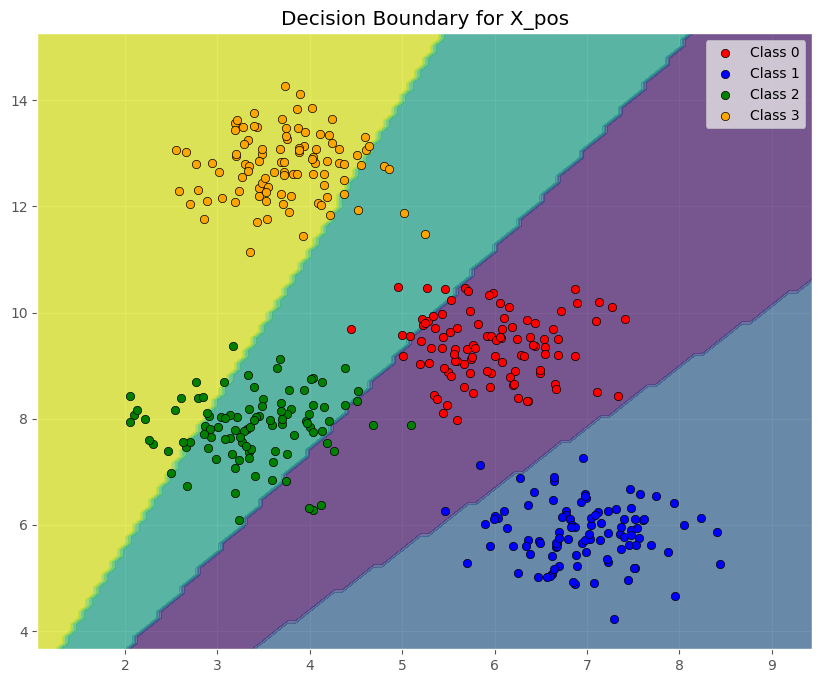

In [84]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][y_true == 0], X_pos[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos[:, 0][y_true == 1], X_pos[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos[:, 0][y_true == 2], X_pos[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos[:, 0][y_true == 3], X_pos[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos")
plt.show()

Розрахунок критеріїв якості:

In [85]:
metrics.confusion_matrix(test_labels_pos, model.predict(test_data_pos))

array([[17,  0,  3,  0],
       [ 1, 23,  0,  0],
       [ 3,  0, 12,  3],
       [ 0,  0,  0, 18]])

In [86]:
metrics.precision_score(test_labels_pos, model.predict(test_data_pos), average=None)

array([0.80952381, 1.        , 0.8       , 0.85714286])

In [87]:
metrics.recall_score(test_labels_pos, model.predict(test_data_pos), average=None)

array([0.85      , 0.95833333, 0.66666667, 1.        ])

In [88]:
metrics.f1_score(test_labels_pos, model.predict(test_data_pos), average=None)

array([0.82926829, 0.9787234 , 0.72727273, 0.92307692])

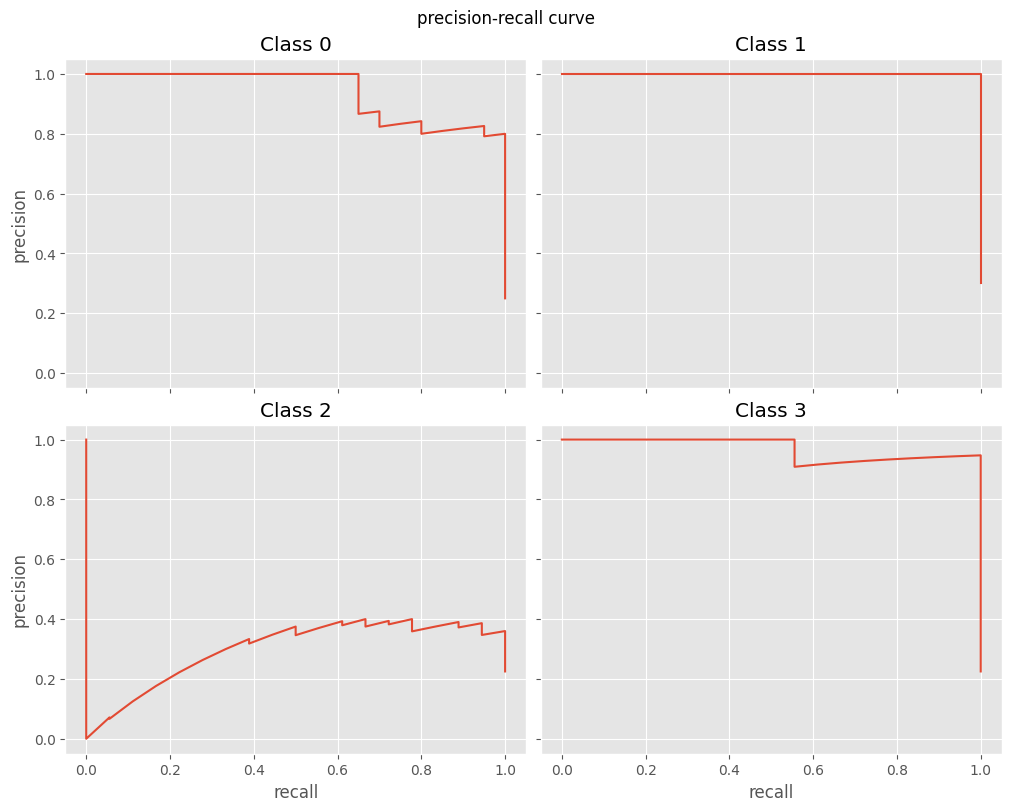

In [89]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 0, model.predict_proba(test_data_pos)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 1, model.predict_proba(test_data_pos)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 2, model.predict_proba(test_data_pos)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 3, model.predict_proba(test_data_pos)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

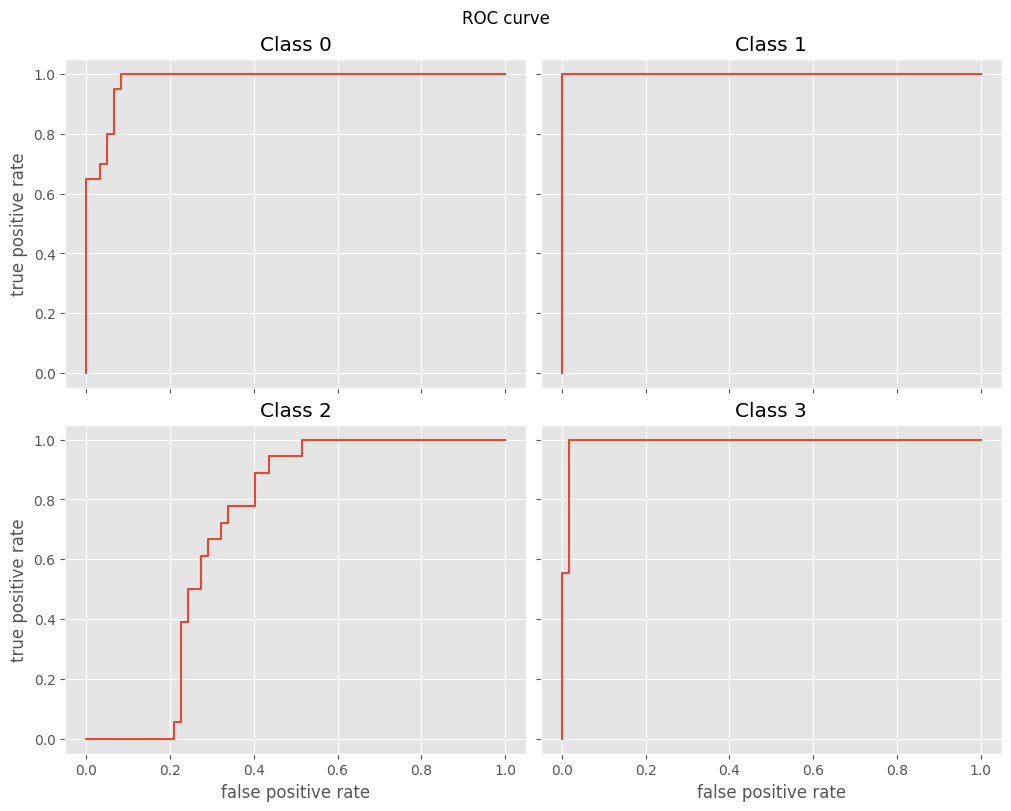

In [90]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 0, model.predict_proba(test_data_pos)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 1, model.predict_proba(test_data_pos)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 2, model.predict_proba(test_data_pos)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 3, model.predict_proba(test_data_pos)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [91]:
metrics.roc_auc_score(test_labels_pos, model.predict_proba(test_data_pos), multi_class='ovr', average=None)

array([0.97916667, 1.        , 0.70519713, 0.99283154])

Решітчастий пошук для підбору гіперпараметрів:

In [92]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_pos, train_labels_pos)
grid_search.best_estimator_

MultinomialNB(alpha=1)

Навчання моделі на підмножині навчальних даних

In [93]:
model.fit(train_data_pos[:20], train_labels_pos[:20])
model.predict(test_data_pos)

array([0, 3, 3, 3, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 3, 2, 2,
       3, 1, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2,
       3, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 2, 2, 2])

In [94]:
test_labels_pos

array([1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 1, 2, 1, 3, 2, 1, 0, 2, 3, 2, 2, 0,
       3, 1, 2, 3, 0, 2, 1, 1, 0, 2, 3, 0, 2, 1, 3, 0, 0, 3, 0, 2, 2, 3,
       3, 1, 1, 1, 0, 0, 0, 1, 2, 2, 3, 3, 1, 0, 2, 1, 2, 0, 2, 0, 3, 0,
       1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 3, 0, 2, 3])

In [95]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 49 прикладів з 80


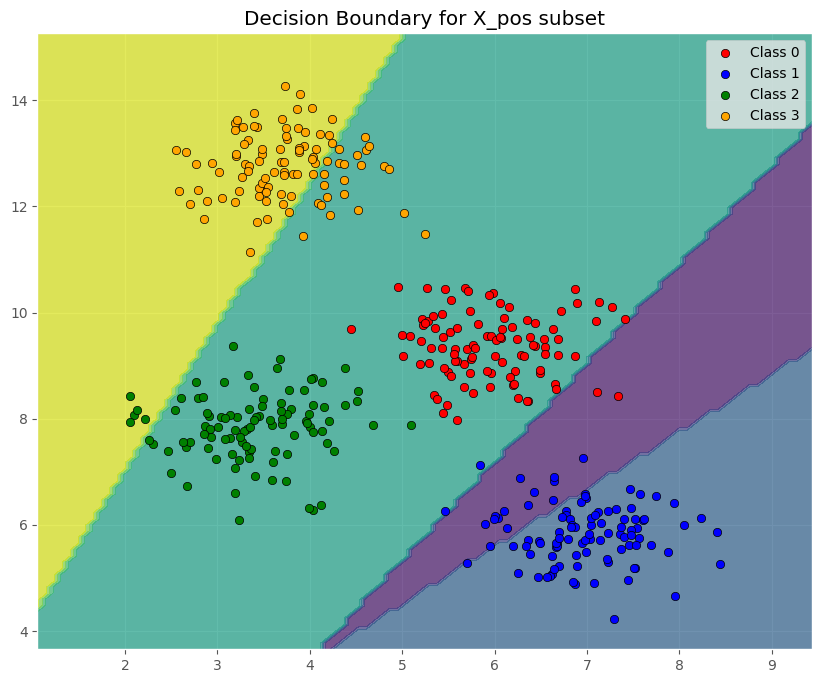

In [96]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][y_true == 0], X_pos[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos[:, 0][y_true == 1], X_pos[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos[:, 0][y_true == 2], X_pos[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos[:, 0][y_true == 3], X_pos[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos subset")
plt.show()

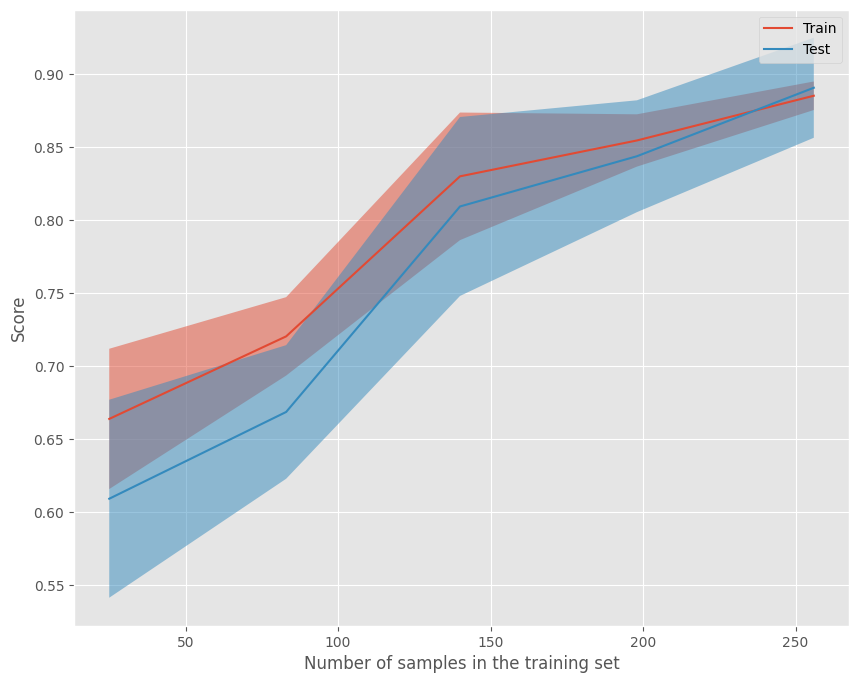

In [97]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_pos, train_labels_pos)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною та не вирішує добре поставлену задачу класифікації.

Побудова моделі 4. Припущення про те що дані в кожному класі мають поліноміальний розпоіл для даних Х_stretched

In [98]:
X_pos_stretched = X_stretched + 5
train_data_pos_stretched, test_data_pos_stretched, train_labels_pos_stretched, test_labels_pos_stretched = model_selection.train_test_split(X_pos_stretched, y_true, test_size=0.2)

In [99]:
model = naive_bayes.MultinomialNB()
model.fit(train_data_pos_stretched, train_labels_pos_stretched)
model.predict(test_data_pos_stretched)

array([1, 1, 2, 3, 1, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 3, 2,
       3, 3, 3, 2, 3, 1, 2, 2, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1,
       2, 3, 3, 3, 1, 3, 2, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2,
       1, 3, 2, 1, 2, 1, 3, 3, 1, 1, 2, 2, 3, 3])

In [100]:
test_labels_pos_stretched

array([0, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 0, 2, 0, 2, 3, 0, 1, 0, 0, 2, 2,
       0, 3, 3, 2, 1, 0, 2, 2, 1, 3, 0, 2, 1, 3, 1, 1, 2, 0, 1, 1, 0, 0,
       2, 3, 3, 3, 1, 1, 2, 3, 0, 3, 1, 0, 0, 0, 2, 3, 3, 0, 3, 2, 3, 2,
       1, 3, 2, 1, 2, 1, 3, 0, 1, 1, 2, 2, 0, 0])

In [101]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos_stretched == model.predict(test_data_pos_stretched))} прикладів з {len(test_labels_pos_stretched)}')

Правильно класифіковано 52 прикладів з 80


Імовірно присутнє перенавчання моделі

Апостеріорні імовірності:

In [102]:
model.predict_proba(test_data_pos_stretched)

array([[0.33028151, 0.34685056, 0.08346716, 0.23940077],
       [0.33655036, 0.35632488, 0.07646606, 0.2306587 ],
       [0.18341715, 0.17494289, 0.350823  , 0.29081695],
       [0.23511392, 0.22982259, 0.23588666, 0.29917684],
       [0.29356727, 0.29906693, 0.13625819, 0.27110762],
       [0.24785458, 0.24410254, 0.21151914, 0.29652374],
       [0.26889203, 0.27078494, 0.18176308, 0.27855995],
       [0.29326075, 0.29734729, 0.13326666, 0.2761253 ],
       [0.15502048, 0.14550889, 0.41907903, 0.2803916 ],
       [0.30702289, 0.31696144, 0.11789788, 0.25811779],
       [0.23923064, 0.23430931, 0.2274713 , 0.29898874],
       [0.30365379, 0.31202404, 0.12152925, 0.26279291],
       [0.18072451, 0.17216362, 0.35735371, 0.28975816],
       [0.28320466, 0.28652979, 0.1532761 , 0.27698945],
       [0.11763053, 0.10793053, 0.51805823, 0.25638071],
       [0.20227438, 0.19404965, 0.30350373, 0.30017224],
       [0.28949464, 0.29416049, 0.14299621, 0.27334865],
       [0.28123447, 0.28544789,

Границі рішень:

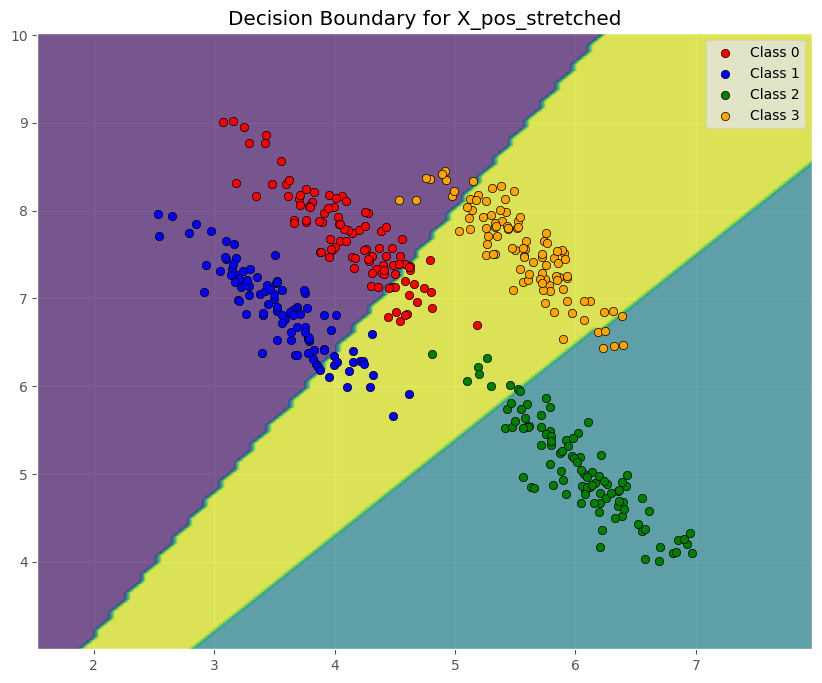

In [103]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_pos_stretched[:, 0][y_true == 0], X_pos_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos_stretched[:, 0][y_true == 1], X_pos_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos_stretched[:, 0][y_true == 2], X_pos_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos_stretched[:, 0][y_true == 3], X_pos_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos_stretched")
plt.show()

Розрахунок критеріїв якості:

In [104]:
metrics.confusion_matrix(test_labels_pos_stretched, model.predict(test_data_pos_stretched))

array([[ 0, 15,  0,  6],
       [ 0, 15,  0,  4],
       [ 0,  0, 19,  1],
       [ 0,  1,  1, 18]])

In [105]:
metrics.precision_score(test_labels_pos_stretched, model.predict(test_data_pos_stretched), average=None)

/home/ilyahl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.48387097, 0.95      , 0.62068966])

In [106]:
metrics.recall_score(test_labels_pos_stretched, model.predict(test_data_pos_stretched), average=None)

array([0.        , 0.78947368, 0.95      , 0.9       ])

In [107]:
metrics.f1_score(test_labels_pos_stretched, model.predict(test_data_pos_stretched), average=None)

array([0.        , 0.6       , 0.95      , 0.73469388])

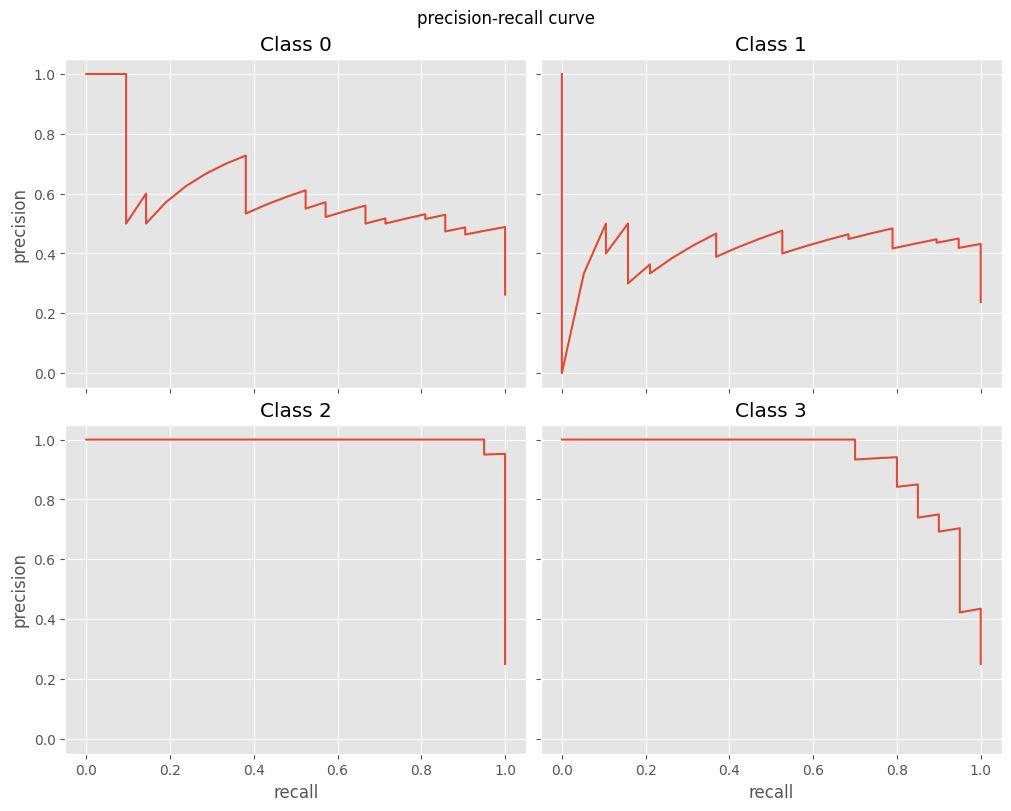

In [108]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 0, model.predict_proba(test_data_pos_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 1, model.predict_proba(test_data_pos_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 2, model.predict_proba(test_data_pos_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 3, model.predict_proba(test_data_pos_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

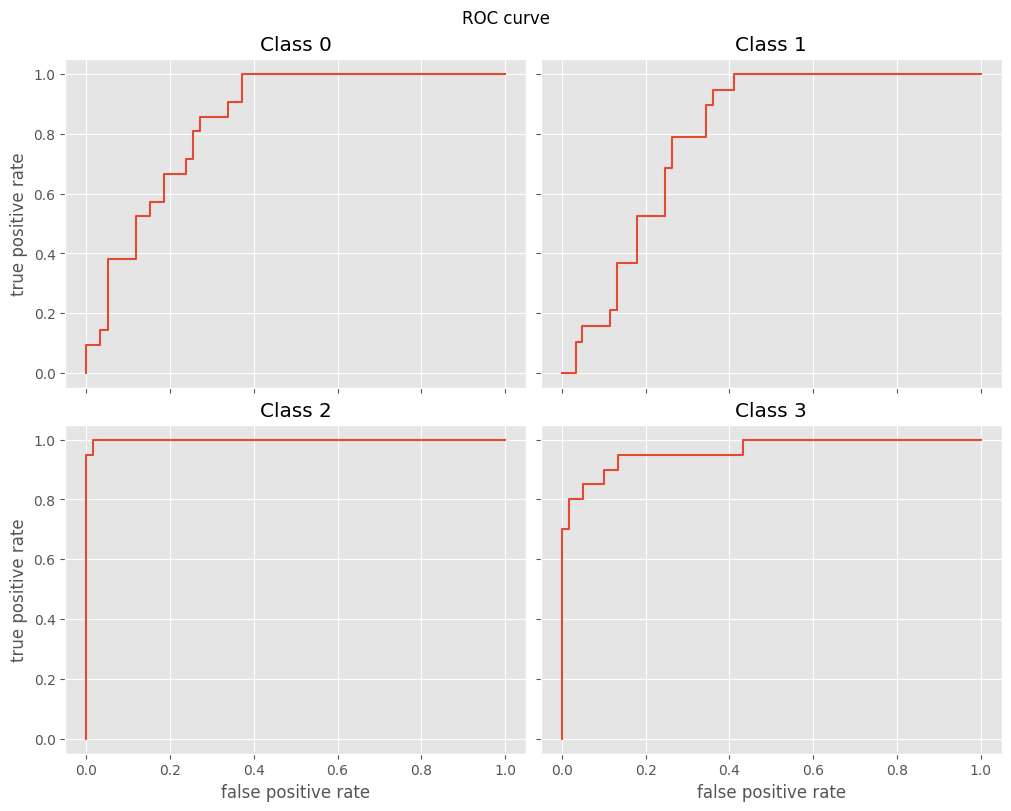

In [109]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 0, model.predict_proba(test_data_pos_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 1, model.predict_proba(test_data_pos_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 2, model.predict_proba(test_data_pos_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 3, model.predict_proba(test_data_pos_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [110]:
metrics.roc_auc_score(test_labels_pos_stretched, model.predict_proba(test_data_pos_stretched), multi_class='ovr', average=None)

array([0.84422922, 0.79551337, 0.99916667, 0.9625    ])

Решітчастий пошук для підбору гіперпараметрів:

In [111]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_pos_stretched, train_labels_pos_stretched)
grid_search.best_estimator_

MultinomialNB(alpha=1)

Навчання моделі на підмножині навчальних даних

In [112]:
model.fit(train_data_pos_stretched[:20], train_labels_pos_stretched[:20])
model.predict(test_data_pos_stretched)

array([0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0])

In [113]:
test_labels_pos_stretched

array([0, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 0, 2, 0, 2, 3, 0, 1, 0, 0, 2, 2,
       0, 3, 3, 2, 1, 0, 2, 2, 1, 3, 0, 2, 1, 3, 1, 1, 2, 0, 1, 1, 0, 0,
       2, 3, 3, 3, 1, 1, 2, 3, 0, 3, 1, 0, 0, 0, 2, 3, 3, 0, 3, 2, 3, 2,
       1, 3, 2, 1, 2, 1, 3, 0, 1, 1, 2, 2, 0, 0])

In [114]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos_stretched == model.predict(test_data_pos_stretched))} прикладів з {len(test_labels_pos_stretched)}')

Правильно класифіковано 40 прикладів з 80


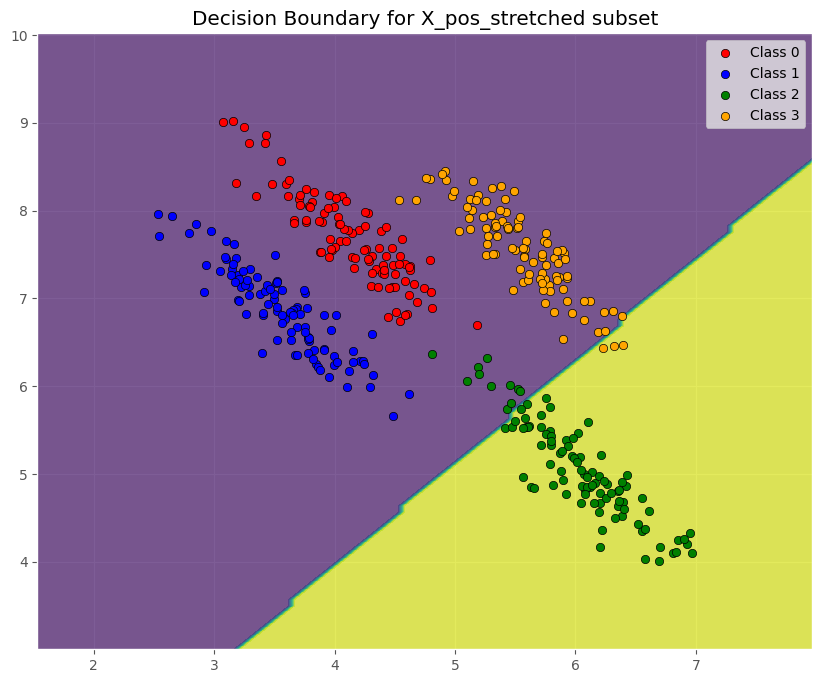

In [115]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_pos_stretched[:, 0][y_true == 0], X_pos_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos_stretched[:, 0][y_true == 1], X_pos_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos_stretched[:, 0][y_true == 2], X_pos_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos_stretched[:, 0][y_true == 3], X_pos_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos_stretched subset")
plt.show()

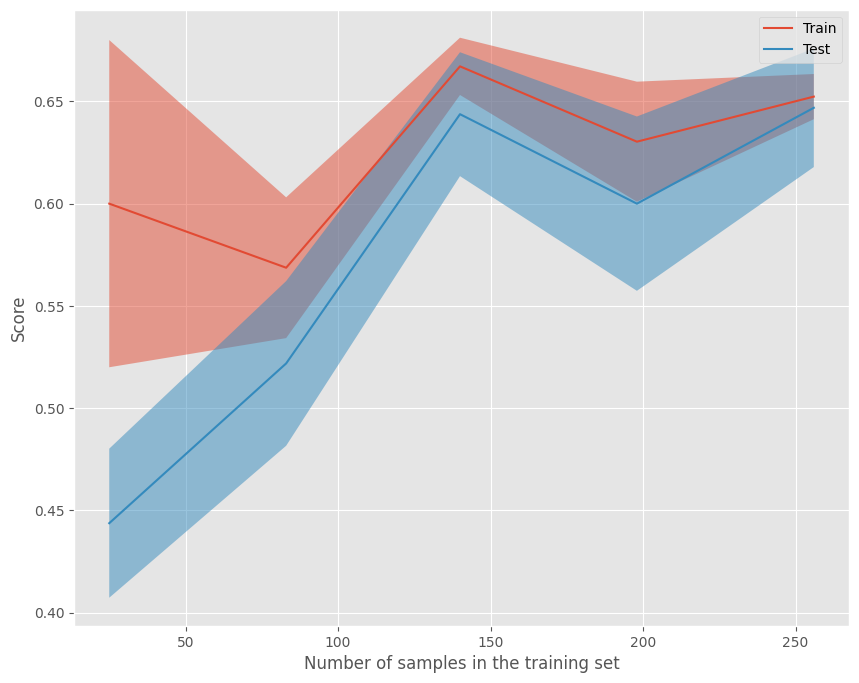

In [116]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_pos_stretched, train_labels_pos_stretched)
plt.show()

### Набір даних (б)

In [117]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

Візуалізація даних

In [118]:
np.unique(Y)

array([False,  True])

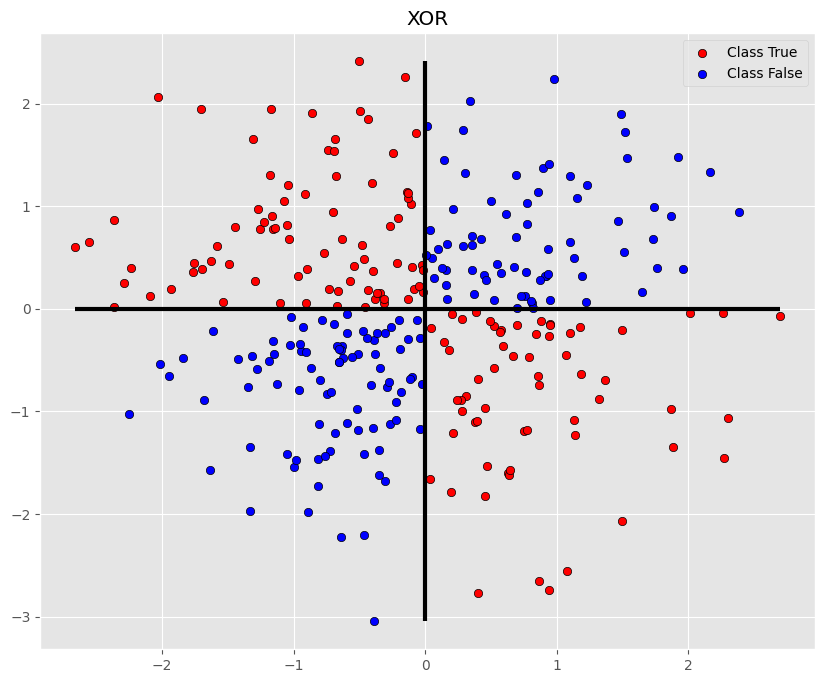

In [119]:
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.vlines(0, ymin=X[:, 1].min(), ymax=X[:, 1].max(), linewidth=3, colors='black')
plt.hlines(0, xmin=X[:, 0].min(), xmax=X[:, 0].max(), linewidth=3, colors='black')
plt.legend()
plt.title("XOR")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [120]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, Y, test_size=0.2)

In [121]:
train_data.shape

(240, 2)

In [122]:
test_data.shape

(60, 2)

In [123]:
train_labels.shape

(240,)

In [124]:
test_labels.shape

(60,)

Побудова моделі 1. Припущення про те що дані в кожному класі мають нормальний розпоіл без коваріації між вимірами

In [125]:
model = naive_bayes.GaussianNB()
model.fit(train_data, train_labels)
model.predict(test_data)

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [126]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [127]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 33 прикладів з 60


Апостеріорні імовірності:

In [128]:
model.predict_proba(test_data)

array([[0.57765033, 0.42234967],
       [0.43614082, 0.56385918],
       [0.56300217, 0.43699783],
       [0.59893612, 0.40106388],
       [0.56694016, 0.43305984],
       [0.59875736, 0.40124264],
       [0.54049563, 0.45950437],
       [0.45911708, 0.54088292],
       [0.57676976, 0.42323024],
       [0.5728912 , 0.4271088 ],
       [0.58019667, 0.41980333],
       [0.5893584 , 0.4106416 ],
       [0.59193636, 0.40806364],
       [0.38060602, 0.61939398],
       [0.6027515 , 0.3972485 ],
       [0.47581829, 0.52418171],
       [0.59448813, 0.40551187],
       [0.58363347, 0.41636653],
       [0.59149988, 0.40850012],
       [0.55527833, 0.44472167],
       [0.58216592, 0.41783408],
       [0.56036853, 0.43963147],
       [0.60432891, 0.39567109],
       [0.42011038, 0.57988962],
       [0.5739068 , 0.4260932 ],
       [0.5974298 , 0.4025702 ],
       [0.59853678, 0.40146322],
       [0.55927988, 0.44072012],
       [0.58139344, 0.41860656],
       [0.57382061, 0.42617939],
       [0.

Границі рішень:

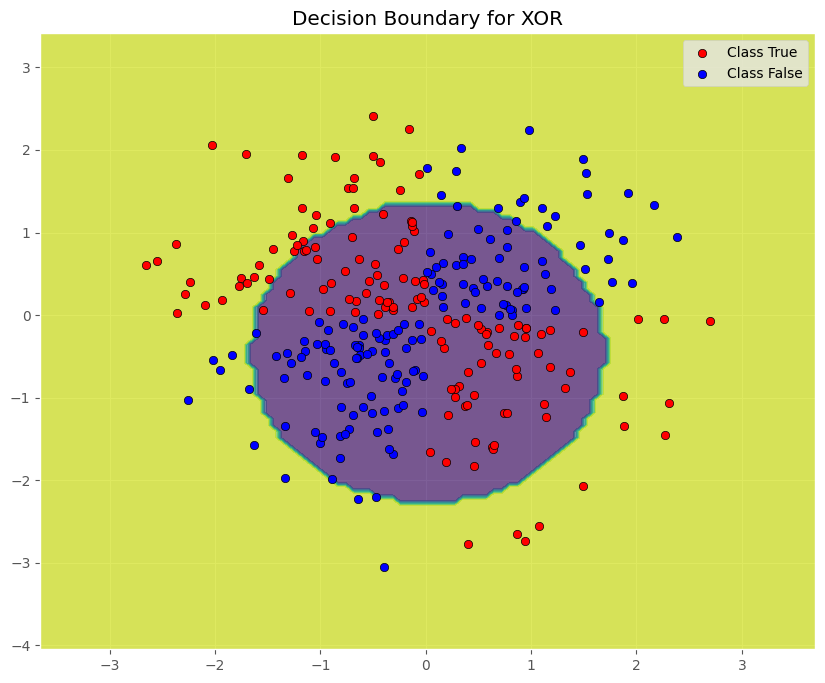

In [129]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR")
plt.show()

Розрахунок критеріїв якості:

In [130]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[26,  5],
       [22,  7]])

In [131]:
metrics.precision_score(test_labels, model.predict(test_data))

0.5833333333333334

In [132]:
metrics.recall_score(test_labels, model.predict(test_data))

0.2413793103448276

In [133]:
metrics.f1_score(test_labels, model.predict(test_data))

0.34146341463414637

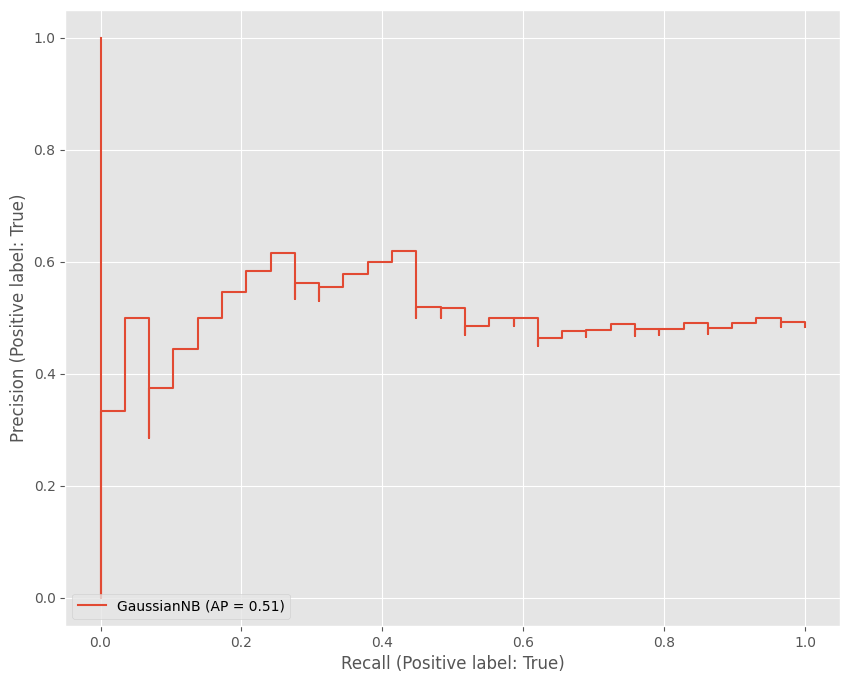

In [134]:
metrics.PrecisionRecallDisplay.from_estimator(model, test_data, test_labels)
plt.show()

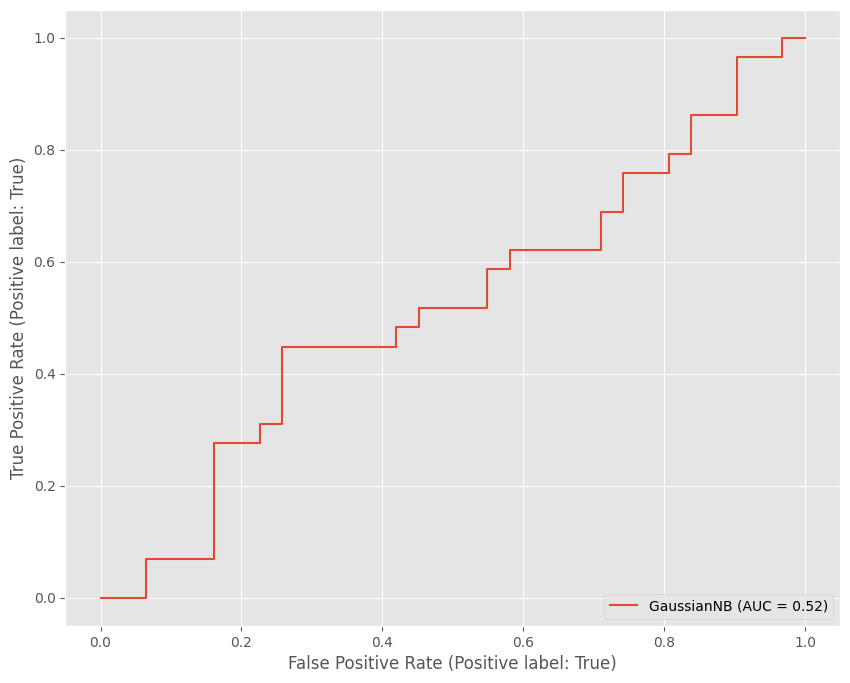

In [135]:
metrics.RocCurveDisplay.from_estimator(model, test_data, test_labels)
plt.show()

In [136]:
metrics.roc_auc_score(test_labels, model.predict(test_data))

0.5400444938820913

Решітчастий пошук для підбору гіперпараметрів:

In [137]:
parameters = {'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

GaussianNB(var_smoothing=0.01)

Навчання моделі на підмножині навчальних даних

In [138]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False])

In [139]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [140]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 30 прикладів з 60


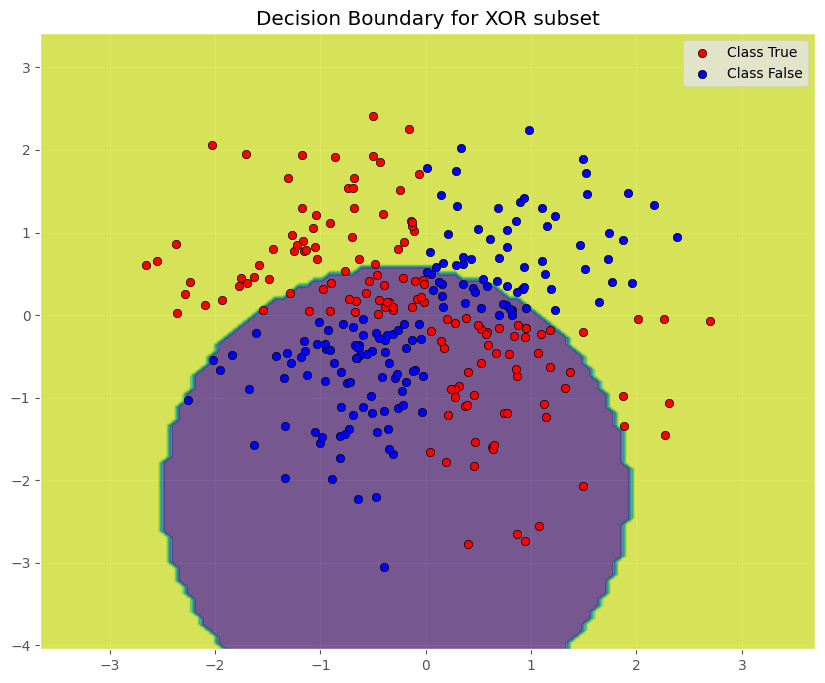

In [141]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR subset")
plt.show()

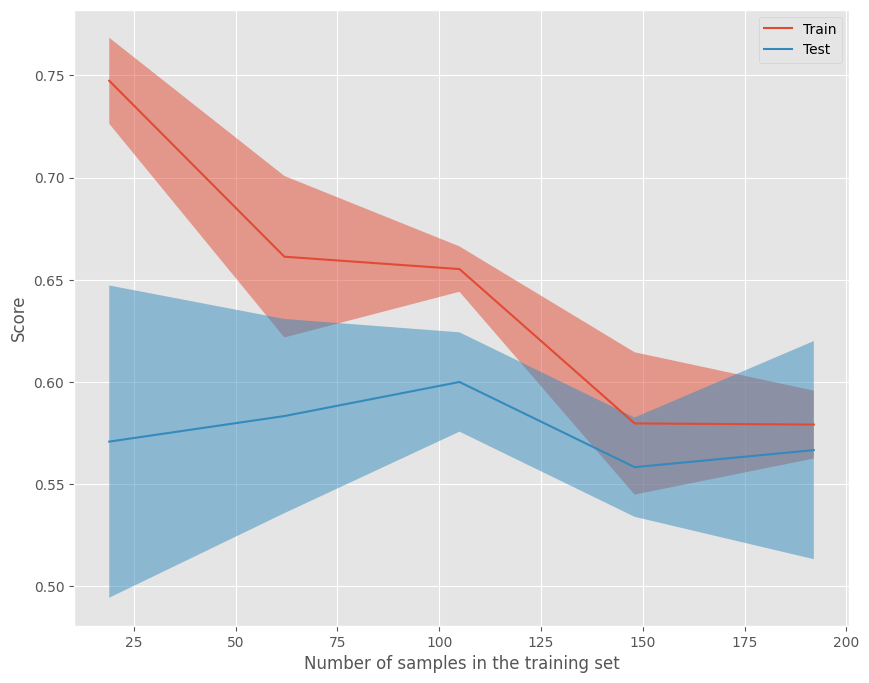

In [142]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, в даному випадку від розміру навчальної множини якість моделі не залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною та не вирішує добре поставлену задачу класифікації.

Побудова моделі 2. Припущення про те що дані в кожному класі мають поліноміальний розпоіл

In [143]:
X_pos = X + 5
train_data_pos, test_data_pos, train_labels_pos, test_labels_pos = model_selection.train_test_split(X_pos, Y, test_size=0.2)

In [144]:
model = naive_bayes.MultinomialNB()
model.fit(train_data_pos, train_labels_pos)
model.predict(test_data_pos)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [145]:
test_labels_pos

array([False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True])

In [146]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 30 прикладів з 60


Апостеріорні імовірності:

In [147]:
model.predict_proba(test_data_pos)

array([[0.52856201, 0.47143799],
       [0.52659859, 0.47340141],
       [0.53890424, 0.46109576],
       [0.52539881, 0.47460119],
       [0.5446195 , 0.4553805 ],
       [0.53118485, 0.46881515],
       [0.51741979, 0.48258021],
       [0.54241103, 0.45758897],
       [0.56240062, 0.43759938],
       [0.51444938, 0.48555062],
       [0.53440749, 0.46559251],
       [0.51386725, 0.48613275],
       [0.53663535, 0.46336465],
       [0.53176657, 0.46823343],
       [0.52717898, 0.47282102],
       [0.52833795, 0.47166205],
       [0.54292617, 0.45707383],
       [0.53247812, 0.46752188],
       [0.53031829, 0.46968171],
       [0.53884308, 0.46115692],
       [0.53641109, 0.46358891],
       [0.52552155, 0.47447845],
       [0.53854941, 0.46145059],
       [0.52123511, 0.47876489],
       [0.53101194, 0.46898806],
       [0.54001206, 0.45998794],
       [0.53136493, 0.46863507],
       [0.54533787, 0.45466213],
       [0.53856052, 0.46143948],
       [0.54074459, 0.45925541],
       [0.

Границі рішень:

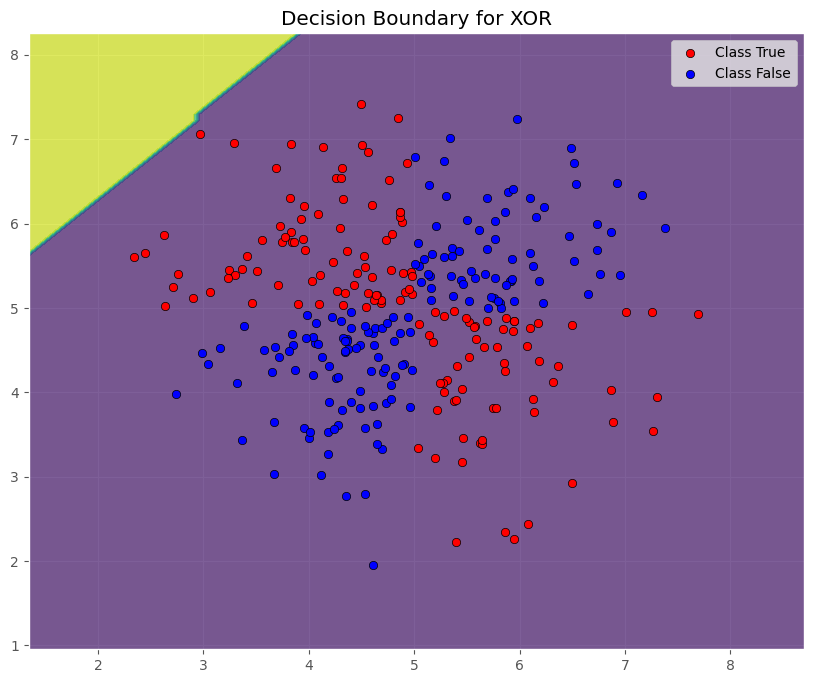

In [148]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][Y == True], X_pos[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X_pos[:, 0][Y == False], X_pos[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR")
plt.show()

Розрахунок критеріїв якості:

In [149]:
metrics.confusion_matrix(test_labels_pos, model.predict(test_data_pos))

array([[30,  0],
       [30,  0]])

In [150]:
metrics.precision_score(test_labels_pos, model.predict(test_data_pos))

/home/ilyahl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [151]:
metrics.recall_score(test_labels_pos, model.predict(test_data_pos))

0.0

In [152]:
metrics.f1_score(test_labels_pos, model.predict(test_data_pos))

0.0

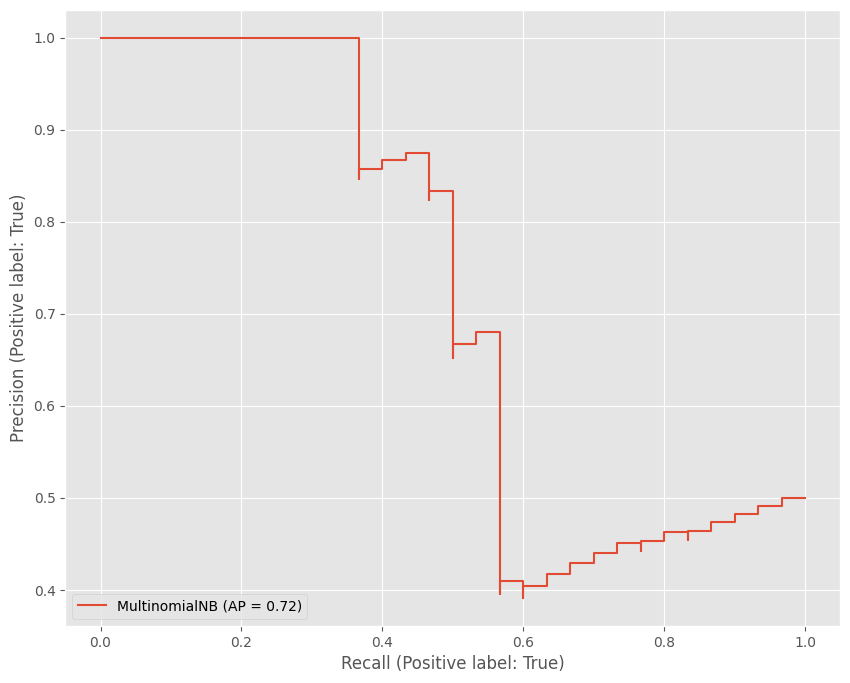

In [153]:
metrics.PrecisionRecallDisplay.from_estimator(model, test_data_pos, test_labels_pos)
plt.show()

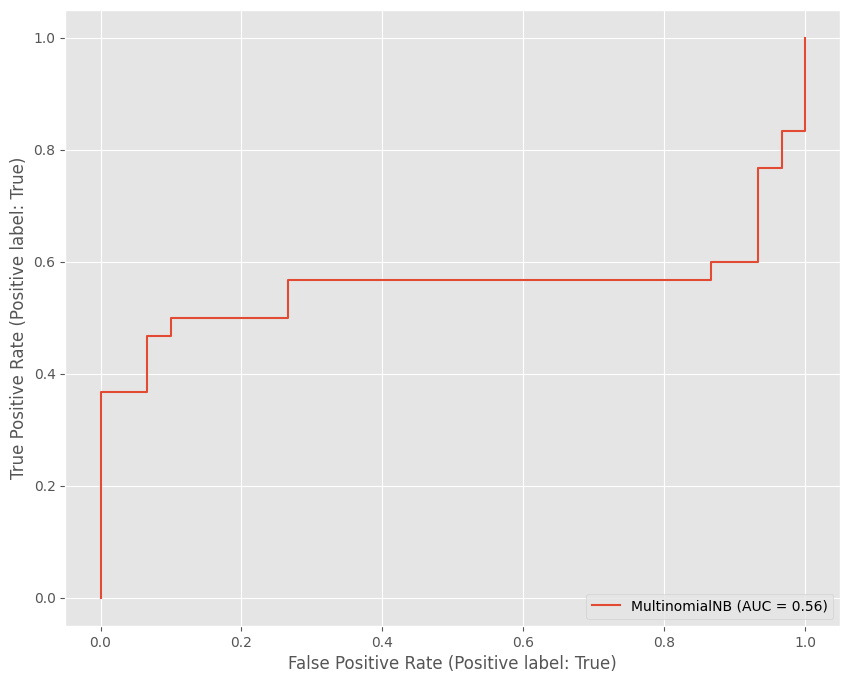

In [154]:
metrics.RocCurveDisplay.from_estimator(model, test_data_pos, test_labels_pos)
plt.show()

In [155]:
metrics.roc_auc_score(test_labels_pos, model.predict(test_data_pos))

0.5

Решітчастий пошук для підбору гіперпараметрів:

In [156]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_pos, train_labels_pos)
grid_search.best_estimator_

MultinomialNB(alpha=1)

Навчання моделі на підмножині навчальних даних

In [157]:
model.fit(train_data_pos[:20], train_labels_pos[:20])
model.predict(test_data_pos)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [158]:
test_labels_pos

array([False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True])

In [159]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 30 прикладів з 60


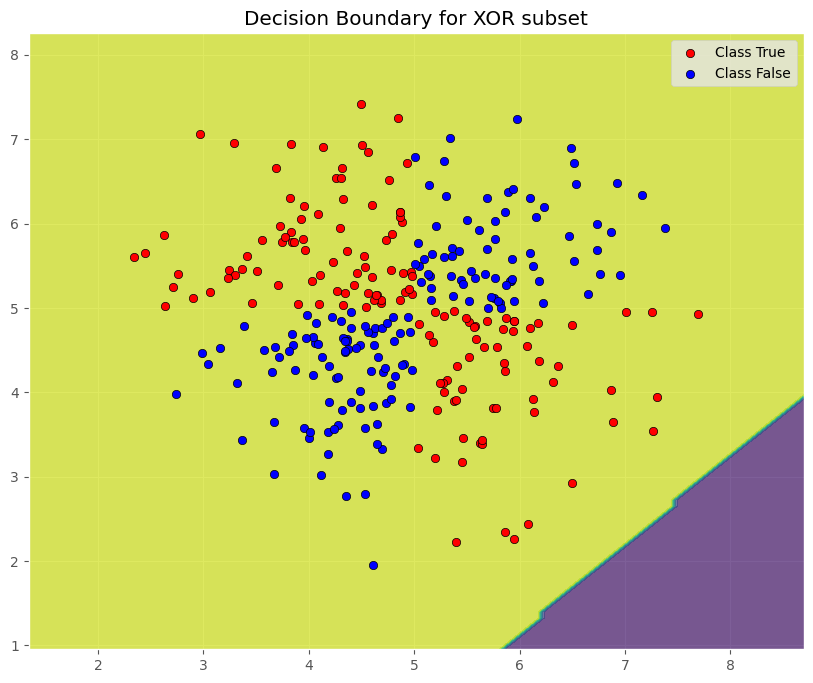

In [160]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][Y == True], X_pos[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X_pos[:, 0][Y == False], X_pos[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR subset")
plt.show()

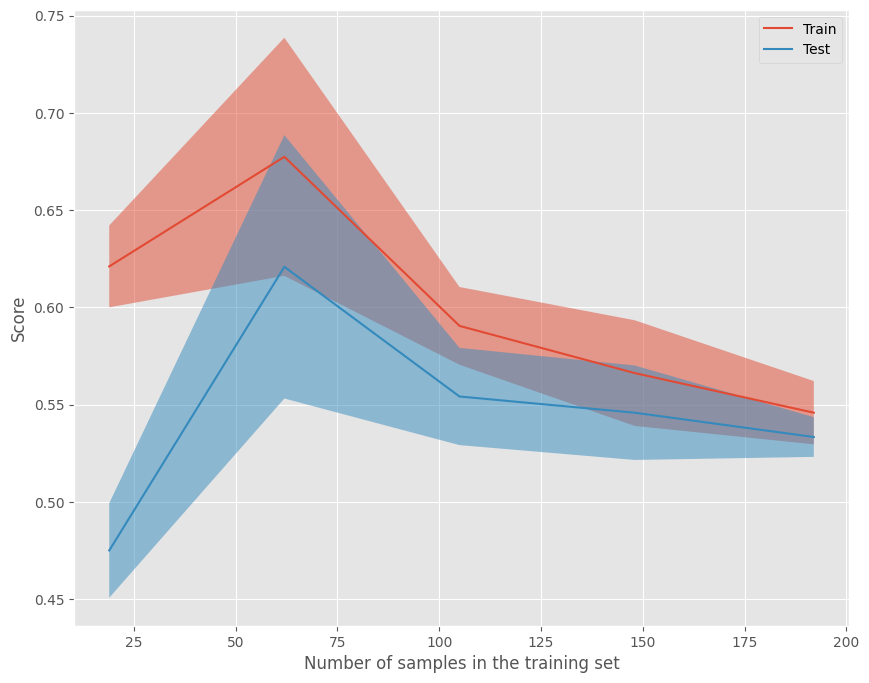

In [161]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_pos, train_labels_pos)
plt.show()

Отже, в даному випадку від розміру навчальної множини якість моделі не залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною та взаглі не вирішує добре поставлену задачу класифікації.